In [80]:
import numpy as np

In [81]:
test_features = np.load("test_features.npy")
test_labels = np.load("test_labels.npy")
training_features1 = np.load("training_features1.npy")
training_features2 = np.load("training_features2.npy")
training_labels1 = np.load("training_labels1.npy")
training_labels2 = np.load("training_labels2.npy")
validation_features = np.load("validation_features.npy")
validation_labels = np.load("validation_labels.npy")

In [82]:
small_train_features=training_features1[0:500]
small_train_labels=training_labels1[0:500]
small_train_features = np.concatenate( ( np.ones((small_train_features.shape[0], 1)), small_train_features ), axis = 1 )
training_features1 = np.concatenate( ( np.ones((training_features1.shape[0], 1)), training_features1 ), axis = 1 )
validation_features = np.concatenate( ( np.ones((validation_features.shape[0], 1)), validation_features ), axis = 1 )

In [83]:
for i in range(small_train_labels.shape[0]):
    if(small_train_labels[i]==0):
        small_train_labels[i]=-1
for i in range(training_labels1.shape[0]):
    if(training_labels1[i]==0):
        training_labels1[i]=-1
for i in range(validation_labels.shape[0]):
    if(validation_labels[i]==0):
        validation_labels[i]=-1

In [84]:
w_init = np.random.randn( training_features1.shape[1] )*0.001
w_init[0] = 0

In [85]:
#ridge
def loglikelihood(w, X, y, alpha): 
    #compute loglikelihood for current w, b, given the data X, y
    #w is a vector, b is a scalr, X is a n*p matrix and y is a vector.
    tmp = 1. + np.exp(-y*(np.dot(X,w)))
    prob = 1./tmp
    X = X.T #X becomes a p*n matrix so the gradVal can be compute straight-forwardly.
    gradVal = np.dot(X,y*(1-prob))
    penalty = alpha/2.*np.sum(w[1:]**2)
    gradPenalty = -alpha*w
    gradPenalty[0] = 0;
    return -np.sum( np.log( tmp ) ) - penalty, gradVal + gradPenalty

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
# %load gradient_ascent
def gradient_ascent(f,x,init_step,iterations):  
    f_val,grad = f(x)                           # compute function value and gradient 
    f_vals = [f_val]
    for it in range(iterations):                # iterate for a fixed number of iterations
        #print 'iteration %d' % it
        done = False                            # initial condition for done
        line_search_it = 0                      # how many times we tried to shrink the step
        step = init_step                        # reset step size to the initial size
        while not done and line_search_it<100:  # are we done yet?
            new_x = x + step*grad               # take a step along the gradient
            new_f_val,new_grad = f(new_x)       # evaluate function value and gradient
            if new_f_val<f_val:                 # did we go too far?
                step = step*0.95                # if so, shrink the step-size
                line_search_it += 1             # how many times did we shrank the step
            else:
                done = True                     # better than the last x, so we move on
        
        if not done:                            # did not find right step size
            print("Line Search failed.")
        else:
            f_val = new_f_val                   # ah, we are ok, accept the new x
            x = new_x
            grad = new_grad
            f_vals.append(f_val)
        plt.plot(f_vals)
    plt.xlabel('Iterations')
    plt.ylabel('Function value')
    return f_val, x

In [87]:
def prediction(w, validData ):
    prob = 1./(1+np.exp(np.matmul(-validData,w)));
    res = np.zeros(validData.shape[0])
    res[prob>=0.5] = 1
    res[prob<0.5] = -1
    return res

accuracy on the validation set 90.10%


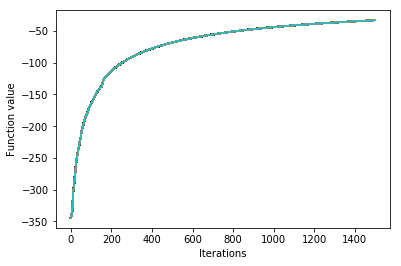

In [88]:
def optimizeFn( init_step, iterations, alpha, w):
    #g = lambda xy0: loglikelihood(xy0, train_data_pad, trainLabel, alpha)
    g = lambda xy0: loglikelihood(xy0, small_train_features, small_train_labels, alpha)
    f_val, update_w = gradient_ascent( g, w, init_step, iterations )
    return f_val, update_w
#see the accuracy on the validation set
#when init_step=1e-5, the model has the best accuracy in the validation set
f_val, update_w=optimizeFn( init_step = 1e-5, iterations=1500, alpha=0, w=w_init) #try different alphas [1000, 2000, 3000]
pred = prediction(update_w, validation_features)
print( 'accuracy on the validation set {:.2f}%'.format( 100.*np.mean(pred==validation_labels)) )

In [89]:
i=j=0;
for result in pred:
    if(result == 1):
        i=i+1;
    else:
        j=j+1;
print("total predicted fake news:",j)
print("total predicted real news:",i)
i=j=0;
for result in validation_labels:
    if(result == 1):
        i=i+1;
    else:
        j=j+1;
print("total actual fake news:",j)
print("total actual real news:",i)
i=j=0;
index=0;
for result in validation_labels:
    if(pred[index]==validation_labels[index]):
        if(pred[index] == 1):
            i=i+1;
        else:
            j=j+1;
    index = index + 1;
print("True Positive:",j)
print("True Negative:",i)
i=j=0;
index=0;
for result in validation_labels:
    if(pred[index]!=validation_labels[index]):
        if(pred[index] == 1):
            i=i+1;
        else:
            j=j+1;
    index = index + 1;
print("False Positive:",j)
print("False Negative:",i)

total predicted fake news: 1014
total predicted real news: 986
total actual fake news: 990
total actual real news: 1010
True Positive: 903
True Negative: 899
False Positive: 111
False Negative: 87
